


# 10162019 Substance P ELISA

In [0]:
#author: kleo1
#date: 10162019
#title: test Substance P ELISA

import numpy as np
import pandas as pd
import seaborn as sns
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.optimize import leastsq


# inline plots
%matplotlib inline


# mount GDrive
from google.colab import drive
drive.mount('gdrive/')

# ============================================================================
# data loading
# ============================================================================

# PLEASE, SPECIFY YOUR PATH TO THE DATA HERE
datapath = 'gdrive/My Drive/JHU CNM/Data/'

# get the list of files to process
file1 = '/'.join((datapath,'191004_subP.csv'))

data = pd.read_csv(file1)

data.head(5)

Drive already mounted at gdrive/; to attempt to forcibly remount, call drive.mount("gdrive/", force_remount=True).


,Conc,Avg Net Stnd OD,Allergic,Allergic 10x,Control,Control 10x
0,10000.00,0.0580,0.1465,0.3815,0.1725,0.3975
1,2500.00,0.1220,0.1545,0.4085,0.1445,0.4335
2,625.00,0.2770,0.1455,0.4525,0.1815,0.4585
3,156.25,0.4355,NaN,NaN,NaN,NaN
4,39.06,0.5240,NaN,NaN,NaN,NaN


In [0]:
conc = data['Conc']
od = data['Avg Net Stnd OD']
alle = data['Allergic']
all10x = data['Allergic 10x']
cntl = data['Control']
cntl10x = data['Control 10x']

alle_m = np.mean(alle)
all10x_m = np.mean(all10x)
cntl_m = np.mean(cntl)
cntl10x_m = np.mean(cntl10x)

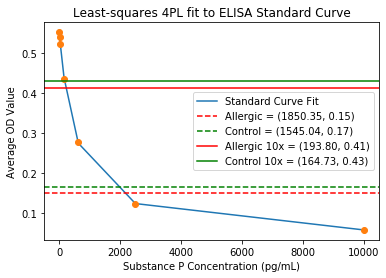

In [0]:
def logistic4(x, A, B, C, D):
    """4PL lgoistic equation."""
    return ((A-D)/(1.0+((x/C)**B))) + D

def residuals(p, y, x):
    """Deviations of data from fitted 4PL curve"""
    A,B,C,D = p
    err = y-logistic4(x, A, B, C, D)
    return err

def peval(x, p):
    """Evaluated value at x with current parameters."""
    A,B,C,D = p
    return logistic4(x, A, B, C, D)

A,B,C,D = 0.55,1.01,548.11,0.03
#A,B,C,D = 1,2,400,0.05
y_true = logistic4(conc, A, B, C, D)

# Initial guess for parameters
p0 = [0, 1, 1, 1]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(od, conc))

#Once A, B, C, D values have been found, run this function to determine concentration of your experimental
def detconc(y, A, B, C, D):
  return C*((A-D)/(y-D)-1**(1/B))

Aconc = detconc(alle_m, A, B, C, D)
A10conc = detconc(all10x_m, A, B, C, D)
Cconc = detconc(cntl_m, A, B, C, D)
C10conc = detconc(cntl10x_m, A, B, C, D)

# Plot results
#plt.plot(conc,peval(conc,plsq[0]),conc,od,'o',conc,y_true)
plt.plot(conc,peval(conc,plsq[0]))
plt.plot(conc,od,'o', label = '_nolegend_')
plt.axhline(alle_m, color = 'r',linestyle = '--')
plt.axhline(cntl_m, color = 'g',linestyle = '--')
plt.axhline(all10x_m, color = 'r')
plt.axhline(cntl10x_m, color = 'g')
plt.title('Least-squares 4PL fit to ELISA Standard Curve')
plt.xlabel('Substance P Concentration (pg/mL)')
plt.ylabel('Average OD Value')

#plt.legend(['Fit', 'Noisy', 'True'], loc='upper left')

plt.legend(['Standard Curve Fit','Allergic = (%0.2f, %0.2f)'%(Aconc,alle_m),'Control = (%0.2f, %0.2f)'%(Cconc,cntl_m),'Allergic 10x = (%0.2f, %0.2f)'%(A10conc,all10x_m),'Control 10x = (%0.2f, %0.2f)'%(C10conc,cntl10x_m)], loc='right')

"""for i, (param, actual, est) in enumerate(zip('ABCD', [A,B,C,D], plsq[0])):
    plt.text(10, 3-i*0.5, '%s = %.2f, est(%s) = %.2f' % (param, actual, param, est))"""
plt.savefig('1016subP.png', dpi = 300)

In [0]:
allec = []
all10xc = []
cntlc = []
cntl10xc = []

for i in range(len(alle)):
  allec.append(detconc(alle[i],A,B,C,D))
  all10xc.append(detconc(all10x[i],A,B,C,D))
  cntlc.append(detconc(cntl[i],A,B,C,D))
  cntl10xc.append(detconc(cntl10x[i],A,B,C,D))
print(allec)
print(all10xc)
print(cntlc)
print(cntl10xc)

[1898.389570815451, 1741.1847791164662, 1919.5713852813856, nan, nan, nan, nan]
[262.7497439544808, 204.90770145310452, 126.48692307692312, nan, nan, nan, nan]
[1452.0107017543862, 1941.1231877729263, 1333.1916501650167, nan, nan, nan, nan]
[227.44700680272098, 158.25232961586136, 117.04099183197206, nan, nan, nan, nan]


# 10292019 Histamine ELISA

In [0]:
#author: kleo1
#date: 10292019
#title: Histamine ELISA

import numpy as np
import pandas as pd
import seaborn as sns
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.optimize import leastsq


# inline plots
%matplotlib inline


# mount GDrive
from google.colab import drive
drive.mount('gdrive/')

# ============================================================================
# data loading
# ============================================================================

# PLEASE, SPECIFY YOUR PATH TO THE DATA HERE
datapath = 'gdrive/My Drive/JHU CNM/Data/'

# get the list of files to process
file1 = '/'.join((datapath,'191029_histamine.csv'))

data = pd.read_csv(file1)

data.head(5)

Drive already mounted at gdrive/; to attempt to forcibly remount, call drive.mount("gdrive/", force_remount=True).


,conc(ng/mL),Avg Net Stnd OD,Control,Allergic,Pazeo,Olopatadine
0,25.000,0.5000,1.1015,1.1335,0.7925,1.0415
1,6.250,0.4350,1.2745,0.9385,1.2115,1.1455
2,1.563,1.0355,1.1245,0.9435,1.3205,1.0865
3,0.391,1.2995,1.1605,0.8855,1.0145,0.9725
4,0.098,1.7700,1.2015,0.8705,1.0725,0.9865


In [0]:
conc = data['conc(ng/mL)']
od = data['Avg Net Stnd OD']
alle = data['Allergic']
paz = data['Pazeo']
cntl = data['Control']
olo = data['Olopatadine']

alle_m = np.mean(alle)
paz_m = np.mean(paz)
cntl_m = np.mean(cntl)
olo_m = np.mean(olo)

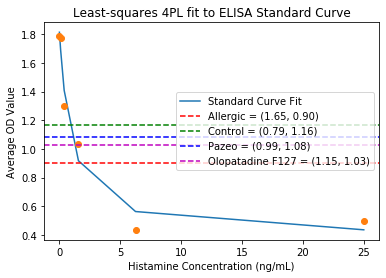

In [0]:
def logistic4(x, A, B, C, D):
    """4PL lgoistic equation."""
    return ((A-D)/(1.0+((x/C)**B))) + D

def residuals(p, y, x):
    """Deviations of data from fitted 4PL curve"""
    A,B,C,D = p
    err = y-logistic4(x, A, B, C, D)
    return err

def peval(x, p):
    """Evaluated value at x with current parameters."""
    A,B,C,D = p
    return logistic4(x, A, B, C, D)

A,B,C,D = 1.81,1.05,0.94,0.39
#A,B,C,D = 1,2,400,0.05
y_true = logistic4(conc, A, B, C, D)

# Initial guess for parameters
p0 = [0, 1, 1, 1]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(od, conc))

#Once A, B, C, D values have been found, run this function to determine concentration of your experimental
def detconc(y, A, B, C, D):
  return C*((A-D)/(y-D)-1**(1/B))

Aconc = detconc(alle_m, A, B, C, D)
pazconc = detconc(paz_m, A, B, C, D)
Cconc = detconc(cntl_m, A, B, C, D)
oloconc = detconc(olo_m, A, B, C, D)

# Plot results
#plt.plot(conc,peval(conc,plsq[0]),conc,od,'o',conc,y_true)
plt.plot(conc,peval(conc,plsq[0]))
plt.plot(conc,od,'o', label = '_nolegend_')
plt.axhline(alle_m, color = 'r', linestyle = '--')
plt.axhline(cntl_m, color = 'g', linestyle = '--')
plt.axhline(paz_m, color = 'b', linestyle = '--')
plt.axhline(olo_m, color = 'm', linestyle = '--')
plt.title('Least-squares 4PL fit to ELISA Standard Curve')
plt.xlabel('Histamine Concentration (ng/mL)')
plt.ylabel('Average OD Value')

#plt.legend(['Fit', 'Noisy', 'True'], loc='upper left')

plt.legend(['Standard Curve Fit','Allergic = (%0.2f, %0.2f)'%(Aconc,alle_m),'Control = (%0.2f, %0.2f)'%(Cconc,cntl_m),'Pazeo = (%0.2f, %0.2f)'%(pazconc,paz_m),'Olopatadine F127 = (%0.2f, %0.2f)'%(oloconc,olo_m)], loc='right')

"""for i, (param, actual, est) in enumerate(zip('ABCD', [A,B,C,D], plsq[0])):
    plt.text(10, 3-i*0.5, '%s = %.2f, est(%s) = %.2f' % (param, actual, param, est))"""
plt.savefig('1029his.png', dpi = 300)

In [0]:
allec = []
pazc = []
cntlc = []
oloc = []

for i in range(len(alle)):
  allec.append(detconc(alle[i],A,B,C,D))
  pazc.append(detconc(paz[i],A,B,C,D))
  cntlc.append(detconc(cntl[i],A,B,C,D))
  oloc.append(detconc(olo[i],A,B,C,D))
print(allec)
print(pazc)
print(cntlc)
print(oloc)

[0.8552925353059853, 1.493546034639927, 1.4715627822944897, 1.7538446014127145, 1.8379396462018724, 4.068630393996248]
[2.376273291925466, 0.6848326232501519, 0.4944975819451908, 1.1973899119295437, 1.0157509157509155, nan]
[0.9360365425158118, 0.5691011871113624, 0.8772906739278418, 0.7923815704088252, 0.7048552064078866, 0.8897464016449622]
[1.1088104374520336, 0.8267769688947717, 0.9764393395549172, 1.3515021459227468, 1.2977200335289185, 1.4628802880288028]


# 10292019 Substance P ELISA


In [0]:
#author: kleo1
#date: 10292019
#title: Histamine ELISA

import numpy as np
import pandas as pd
import seaborn as sns
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.optimize import leastsq


# inline plots
%matplotlib inline


# mount GDrive
from google.colab import drive
drive.mount('gdrive/')

# ============================================================================
# data loading
# ============================================================================

# PLEASE, SPECIFY YOUR PATH TO THE DATA HERE
datapath = 'gdrive/My Drive/JHU CNM/Data/'

# get the list of files to process
file1 = '/'.join((datapath,'191029_subp.csv'))

data = pd.read_csv(file1)

data.head(5)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at gdrive/


,conc(pg/mL),Avg Net Stnd OD,Control,Allergic,Pazeo,Olopatadine
0,10000.00,0.0305,0.125,0.134,0.107,0.117
1,2500.00,0.0760,0.153,0.098,0.125,0.112
2,625.00,0.1455,0.126,0.117,0.097,0.157
3,156.25,0.1860,0.145,0.094,0.097,0.125
4,39.06,0.2995,0.127,0.111,0.133,0.124


In [0]:
conc = data['conc(pg/mL)']
od = data['Avg Net Stnd OD']
alle = data['Allergic']
paz = data['Pazeo']
cntl = data['Control']
olo = data['Olopatadine']

alle_m = np.mean(alle)
paz_m = np.mean(paz)
cntl_m = np.mean(cntl)
olo_m = np.mean(olo)

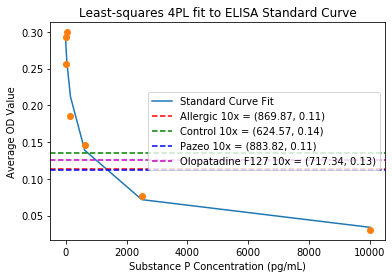

In [0]:
def logistic4(x, A, B, C, D):
    """4PL logistic equation."""
    return ((A-D)/(1.0+((x/C)**B))) + D

def residuals(p, y, x):
    """Deviations of data from fitted 4PL curve"""
    A,B,C,D = p
    err = y-logistic4(x, A, B, C, D)
    return err

def peval(x, p):
    """Evaluated value at x with current parameters."""
    A,B,C,D = p
    return logistic4(x, A, B, C, D)

A,B,C,D = 0.29,0.79,504.9,0.01
#A,B,C,D = 1,2,400,0.05
y_true = logistic4(conc, A, B, C, D)

# Initial guess for parameters
p0 = [0, 1, 1, 1]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(od, conc))

#Once A, B, C, D values have been found, run this function to determine concentration of your experimental
def detconc(y, A, B, C, D):
  return C*((A-D)/(y-D)-1**(1/B))

Aconc = detconc(alle_m, A, B, C, D)
pazconc = detconc(paz_m, A, B, C, D)
Cconc = detconc(cntl_m, A, B, C, D)
oloconc = detconc(olo_m, A, B, C, D)

# Plot results
#plt.plot(conc,peval(conc,plsq[0]),conc,od,'o',conc,y_true)
plt.plot(conc,peval(conc,plsq[0]))
plt.plot(conc,od,'o', label = '_nolegend_')
plt.axhline(alle_m, color = 'r', linestyle = '--')
plt.axhline(cntl_m, color = 'g', linestyle = '--')
plt.axhline(paz_m, color = 'b', linestyle = '--')
plt.axhline(olo_m, color = 'm', linestyle = '--')
plt.title('Least-squares 4PL fit to ELISA Standard Curve')
plt.xlabel('Substance P Concentration (pg/mL)')
plt.ylabel('Average OD Value')

#plt.legend(['Fit', 'Noisy', 'True'], loc='upper left')

plt.legend(['Standard Curve Fit','Allergic 10x = (%0.2f, %0.2f)'%(Aconc,alle_m),'Control 10x = (%0.2f, %0.2f)'%(Cconc,cntl_m),'Pazeo 10x = (%0.2f, %0.2f)'%(pazconc,paz_m),'Olopatadine F127 10x = (%0.2f, %0.2f)'%(oloconc,olo_m)], loc='right')

"""for i, (param, actual, est) in enumerate(zip('ABCD', [A,B,C,D], plsq[0])):
    plt.text(10, 3-i*0.5, '%s = %.2f, est(%s) = %.2f' % (param, actual, param, est))"""
plt.savefig('1029subp.png', dpi = 300)

In [0]:
allec = []
pazc = []
cntlc = []
oloc = []

for i in range(len(alle)):
  allec.append(detconc(alle[i],A,B,C,D))
  pazc.append(detconc(paz[i],A,B,C,D))
  cntlc.append(detconc(cntl[i],A,B,C,D))
  oloc.append(detconc(olo[i],A,B,C,D))
print(allec)
print(pazc)
print(cntlc)
print(oloc)

[635.196774193548, 1101.5999999999997, 816.3336448598129, 1178.0999999999997, 894.8227722772274, 746.1796460176988, nan]
[952.5432989690719, 724.4217391304346, 1120.0655172413792, 1120.0655172413792, 644.4658536585363, nan, nan]
[724.4217391304346, 483.71538461538455, 713.8241379310342, 542.3, 703.4076923076921, 626.0759999999999, nan]
[816.3336448598129, 881.1, 456.81428571428563, 724.4217391304346, 735.2052631578945, 792.090825688073, nan]
